# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using Seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [50]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data.Gender == 'Male']
female_df =  data.loc[data.Gender == 'Female']

print(male_df.describe())
print(female_df.describe())
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

            Height       Weight
count  5000.000000  5000.000000
mean     69.026346   187.020621
std       2.863362    19.781155
min      58.406905   112.902939
25%      67.174679   173.887767
50%      69.027709   187.033546
75%      70.988744   200.357802
max      78.998742   269.989699
            Height       Weight
count  5000.000000  5000.000000
mean     63.708774   135.860093
std       2.696284    19.022468
min      54.263133    64.700127
25%      61.894441   122.934096
50%      63.730924   136.117583
75%      65.563565   148.810926
max      73.389586   202.237214


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

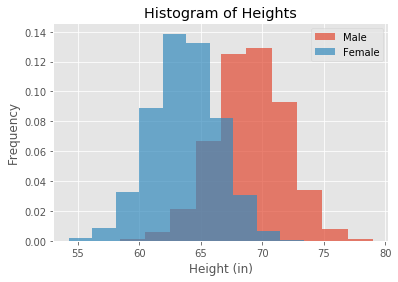

In [51]:
plt.hist(male_df.Height, bins=10, density = True,  alpha = 0.7, label= 'Male');
plt.hist(female_df.Height, bins=10, density = True,  alpha = 0.7, label= 'Female');
plt.ylabel('Frequency')
plt.xlabel('Height (in)')
plt.title('Histogram of Heights')
plt.legend()
plt.show()

In [18]:
# Record your observations - are these inline with your personal observations?


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.hist()`
- The function should return two lists carrying x and y coordinates for plotting the density function

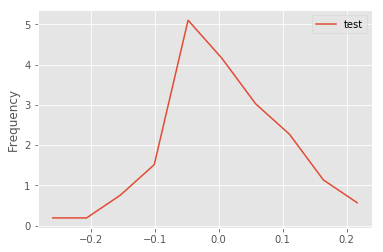

In [58]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    dx = np.zeros(n.size)
    dy = np.zeros(n.size)

    for i in range(n.size):
        dx[i] = (bins[i+1]- bins[i])/2+bins[i]
        dy[i] = n[i]
    return dx, dy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Add overlapping density plots to the histograms plotted earlier

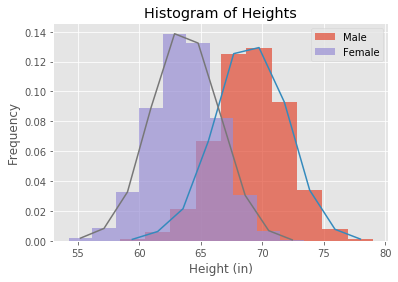

In [59]:
plt.hist(male_df.Height, bins=10, density = True,  alpha = 0.7, label= 'Male', );
x,y = density(male_df.Height)
plt.plot(x,y)
plt.hist(female_df.Height, bins=10, density = True,  alpha = 0.7, label= 'Female');
x1,y1 = density(female_df.Height)
plt.plot(x1,y1)
plt.ylabel('Frequency')
plt.xlabel('Height (in)')
plt.title('Histogram of Heights')
plt.legend()
plt.show()

## Repeat the above exercise for male and female weights

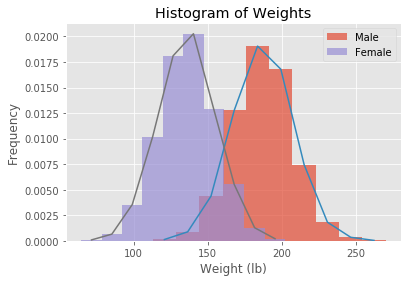

In [60]:
data = male_df.Weight
plt.hist(data, bins=10, density = True,  alpha = 0.7, label= 'Male', );
x,y = density(data)
plt.plot(x,y)
data = female_df.Weight
plt.hist(data, bins=10, density = True,  alpha = 0.7, label= 'Female');
x1,y1 = density(data)
plt.plot(x1,y1)
plt.ylabel('Frequency')
plt.xlabel('Weight (lb)')
plt.title('Histogram of Weights')
plt.legend()
plt.show()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

C:\Users\FlatIron_User\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


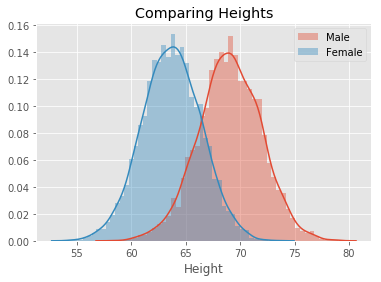

In [62]:
# Code for heights here
import seaborn as sns

sns.distplot(male_df.Height, label = 'Male')
sns.distplot(female_df.Height, label = 'Female')
plt.title('Comparing Heights')
plt.legend()
plt.show()


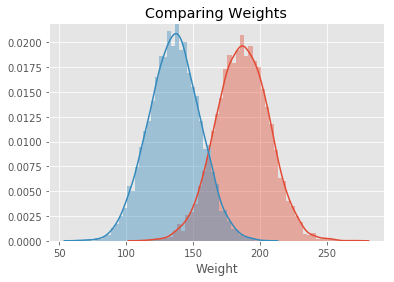

In [24]:
sns.distplot(male_df.Weight, label = 'Male')
sns.distplot(female_df.Height, label = 'Female')
plt.title('Comparing Heights')
plt.legend()
plt.show()

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.